In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

%matplotlib inline

# Iris Data Classification

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [5]:
print("iris_dataset의 key : \n{}".format(iris_dataset.keys()))

iris_dataset의 key : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [9]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [14]:
print("타겟의 이름 : {}".format(iris_dataset['target_names']))
print("특성의 이름 : {}".format(iris_dataset['feature_names']))
print("data 타입 : {}".format(type(iris_dataset['data'])))
print("data 크기 : {}".format(iris_dataset['data'].shape))

타겟의 이름 : ['setosa' 'versicolor' 'virginica']
특성의 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data 타입 : <class 'numpy.ndarray'>
data 크기 : (150, 4)


150개의 Sample Data, 4개의 Feature

In [15]:
print("data의 처음 다섯 행 :\n{}".format(iris_dataset['data'][:5]))

data의 처음 다섯 행 :
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [17]:
# target part
print("target의 타입 : {}".format(type(iris_dataset['target'])))
print("target의 크기: {}".format(iris_dataset['target'].shape))
print("Target : \n{}".format(iris_dataset['target']))

target의 타입 : <class 'numpy.ndarray'>
target의 크기: (150,)
Target : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 훈련 데이터와 테스트 데이터는 절대적으로 나누어야 함. 전체의 75%를 훈련 데이터로 사용하고 25%를 테스트 데이터로 사용하곤 합니다

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.33)

In [23]:
print("X_train 크기 : {}".format(X_train.shape))
print("y_train 크기 : {}".format(y_train.shape))

X_train 크기 : (100, 4)
y_train 크기 : (100,)


In [24]:
print("X_test 크기 : {}".format(X_test.shape))
print("y_test 크기 : {}".format(y_test.shape))

X_test 크기 : (50, 4)
y_test 크기 : (50,)


# 1. 데이터 탐색 ( EDA )
- 비정상적인 값, 특이한 값 처리
- 데이터 전처리
- 산점도 행렬!

In [25]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10de630f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e762b38>]], dtype=object)

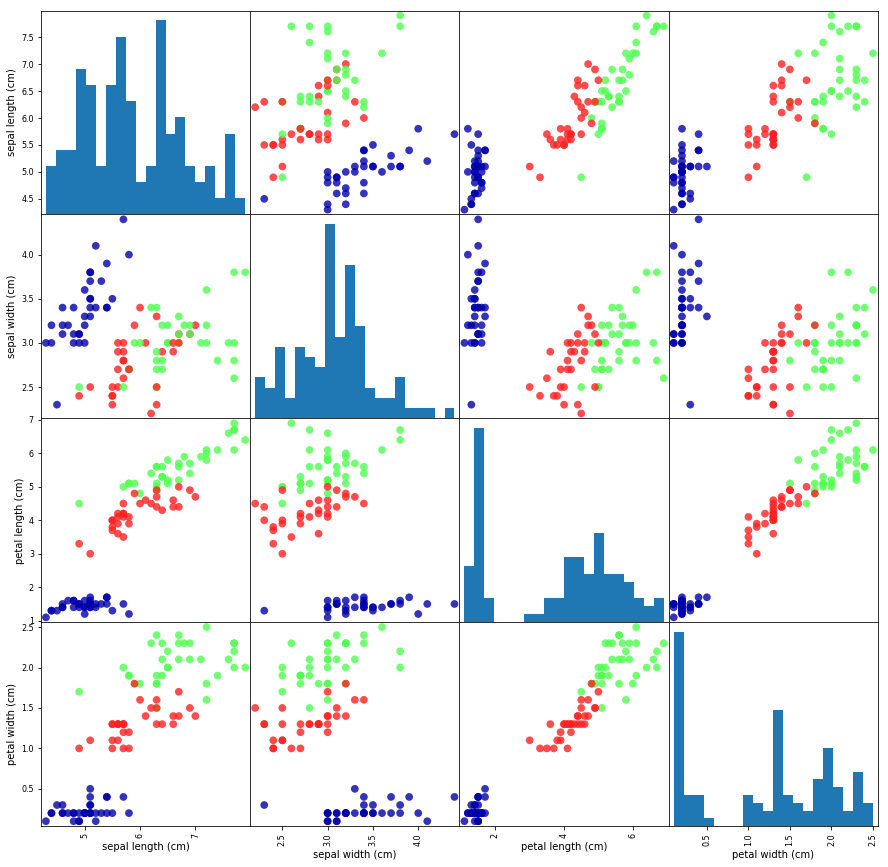

In [30]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins':20}, s=60,
                          alpha=.8, cmap=mglearn.cm3)

In [31]:
# 3개의 클래스가 측정값에 따라 잘 구분되는 것을 확인할 수 있습니다

In [32]:
# knn 알고리즘 : 가장 가까운 k개의 이웃을 찾는다!

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [34]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [36]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [39]:
prediction = knn.predict(X_new)
print("예측 : {}".format(prediction))
print("예측한 타깃의 이름 : {}".format(iris_dataset['target_names'][prediction]))

예측 : [0]
예측한 타깃의 이름 : ['setosa']


# 모델 평가하기
- 정확도를 계산해 모델 성능 평가


In [41]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2]


In [42]:
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도 : 0.96


In [43]:
# knn.score 메서드로도 정확도 계산 가능!
print("테스트 세트의 정확도 : {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도 : 0.96
